<a href="https://colab.research.google.com/github/MicroprocessorX069/Generalized-Bayes-classifier-/blob/master/Bayes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Blog

To start with any program

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## imports

In [0]:
def write_requirements(dict_libraries,dir=""):
  import os
  requirements=""
  for library_name, library in dict_libraries.items():
    requirements+=library_name+"=="+str(library.__version__)+"\n"

  text_file = open(os.path.join(dir,"requirements.txt"), "w")
  n = text_file.write(requirements)
  text_file.close()


In [0]:
libraries_dict={}
import scipy.io
libraries_dict["scipy"]=scipy
import numpy as np
libraries_dict["numpy"]=np
import matplotlib
import matplotlib.pyplot as plt
libraries_dict["matplotlib"]=matplotlib

import math 


write_requirements(libraries_dict)

#variables

In [0]:
data_path="/content/drive/My Drive/Fall 2019/Probability EAS 595/Assignments/Questions/data.mat"
training_size=100
variables={"data_path":data_path, \
           "training_size":training_size, \
           "convert_std_normal": False
           }

## utils

In [6]:
import numpy as np
a=np.array([[1,2,3],[6,8,9],[187,567,234]])
a-2.00000000000123

array([[-1.00000000e+00, -1.23012711e-12,  1.00000000e+00],
       [ 4.00000000e+00,  6.00000000e+00,  7.00000000e+00],
       [ 1.85000000e+02,  5.65000000e+02,  2.32000000e+02]])

No handles with labels found to put in legend.



---------- Section 1: Training -------------

 Calculating the means and standard deviations for 100 samples


---------- Section 2.1: Testing -------------

 Predicting the classes for 101: 1000 samples


---------- Section 2,2: Calculating accuracy for the classifier -------------

Accuracy for the Bayes classifier: 
Accuracy: 0.53 Error rate: 0.47 

---------- Section 3: Standard normal(Z Score) -------------


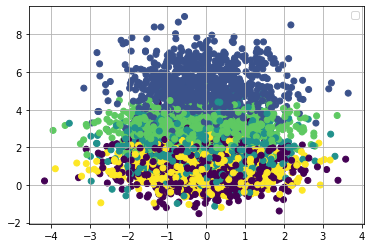


---------- Section 4, Case 1: Training with the z1 data -------------
(900, 5)
Accuracy: 0.20 Error rate: 0.80 


---------- Section 4, Case 2: Training with the f2 data -------------
(900, 5)
Accuracy: 0.55 Error rate: 0.45 



In [24]:
#Return a numpy arrary of the matrix
def read_mat_file(file_dir):
  data = scipy.io.loadmat(file_dir)
  return data

def std_normalize(mat,mean, std_dev):
  '''
  Returns standard normalized matrix
  z=(x-mean)/std_dev
  '''
  mat=(mat-mean)/std_dev
  return mat

def get_normal_prob(mean, std_dev, test):
    prob = test - mean
    prob = np.multiply(prob,prob)
    prob = -1 * prob / (2 * np.multiply(std_dev,std_dev))
    prob = np.exp(prob)
    prob = prob/(math.sqrt(math.pi*2)*std_dev)
    #prob = np.prod(prob, axis = 1)
    return prob

def predict(variables):
  # Outputs the class predicted
  prob=[get_normal_prob(variables['m_std_train']['f1'][i]['m'],\
                        variables['m_std_train']['f1'][i]['std'],
                        variables['test_data']) \
        for i in range(5)]
  return np.argmax(prob,axis=0)


def get_mean_std(array):
  # m: mean ; std: standard deviation
  dict={'m':np.mean(array),'std':np.std(array)}
  return dict

def get_accuracy(predicted):
  n_samples=predicted.shape[0]
  ground_truth=np.array([[0,1,2,3,4] for _ in range(n_samples)])
  from sklearn import metrics
  from sklearn.metrics import accuracy_score
  acc = np.mean(np.array([accuracy_score(predicted[:,i],ground_truth[:,i]) for i in range(5)]))
  print("Accuracy: {:.2f} Error rate: {:.2f} \n".format(acc,1-acc))
  return acc

def plot_clustered_graph(x,y,c):
  fig, ax = plt.subplots()
  scatter = ax.scatter(x, y, c=c)
  ax.legend()
  ax.grid(True)
  plt.show()

class Bayes_Classifier(object):
    """This is a bayes classifier, which predicts classes 
        based on the mean and standard deviations of a feature.

    Attributes:
        name: A string representing the customer's name.
        balance: A float tracking the current balance of the customer's account.
    """

    def __init__(self, data, train_size=100):

        self.data = data
        self.n_samples = data.shape[0]
        self.train_size=train_size
        self.test_data=data[train_size:]
        #self.m_std_train, self.predicted, self.accuracy=
        self.m_std_train={}
        self.ground_truth=np.array([[0,1,2,3,4] for _ in range(self.n_samples)])

    def train(self):
        self.m_std_train={'f1':{0:get_mean_std(self.data[:self.train_size,0]), 
               1:get_mean_std(self.data[:self.train_size,1]), 
               2:get_mean_std(self.data[:self.train_size,2]),   
               3:get_mean_std(self.data[:self.train_size,3]), 
               4:get_mean_std(self.data[:self.train_size,4])}, 
         'f2':{0:get_mean_std(self.data[:self.train_size,0]), 
               1:get_mean_std(self.data[:self.train_size,1]), 
               2:get_mean_std(self.data[:self.train_size,2]),   
               3:get_mean_std(self.data[:self.train_size,3]), 
               4:get_mean_std(self.data[:self.train_size,4])}}
        
        
    def predict(self):
      # Outputs the class predicted
      prob=[get_normal_prob(self.m_std_train['f1'][i]['m'],\
                            self.m_std_train['f1'][i]['std'],
                            self.test_data) \
            for i in range(5)]
      return np.argmax(prob,axis=0)

    def validate(self,predicted):
      
      from sklearn import metrics
      from sklearn.metrics import accuracy_score
      acc = np.mean(np.array([accuracy_score(predicted[:,i],self.ground_truth[self.train_size:,i]) for i in range(5)]))
      print("Accuracy: {:.2f} Error rate: {:.2f} \n".format(acc,1-acc))
      return acc

    def scatter_plot(x,y,c):
      fig, ax = plt.subplots()
      scatter = ax.scatter(x, y, c=c)
      ax.legend()
      ax.grid(True)
      plt.show()


def main(variables):
  data=read_mat_file(variables["data_path"])
  f1_data,f2_data=np.array(data['F1']),np.array(data['F2'])
  n_samples=f1_data.shape[0]
  ground_truth=np.array([[0,1,2,3,4] for _ in range(n_samples)])
    # Training

  #Training on 100 samples
  
  #m_std is dictionary of f1, f2 for each column, c1 c2 c3 c4 and c5.
  print("\n---------- Section 1: Training -------------")
  print("\n Calculating the means and standard deviations for 100 samples\n")
  train_size=variables['training_size']
  b1=Bayes_Classifier(f1_data,train_size)
  b1.train()

  ## Section 2.1: Testing  
  print("\n---------- Section 2.1: Testing -------------")
  print("\n Predicting the classes for 101: 1000 samples\n")

  predicted=b1.predict()

  ## Section 2.2: Calculating accuracy and error rate
  print("\n---------- Section 2,2: Calculating accuracy for the classifier -------------")
  print("\nAccuracy for the Bayes classifier: ")
  acc=b1.validate(predicted)

  ## Section 3: Standard Normal (z score)
  print("---------- Section 3: Standard normal(Z Score) -------------")

  # z1_data is the standard normalized data.
  z1_data=np.swapaxes(np.array([std_normalize(f1_data[:,i],variables['m_std_train']['f1'][i]['m'],\
                        variables['m_std_train']['f1'][i]['std']) 
          for i in range(5)]),0,1)
  
  plot_clustered_graph(z1_data.flatten(),f2_data.flatten(),ground_truth.flatten())

  ## Section 4
  ### Case 1: Training with the z1 data
  print("\n---------- Section 4, Case 1: Training with the z1 data -------------")
  b=Bayes_Classifier(z1_data)
  b.train()
  predicted=b.predict()
  acc=b.validate(predicted)

  print("\n---------- Section 4, Case 2: Training with the f2 data -------------")
  b=Bayes_Classifier(f2_data)
  b.train()
  predicted=b.predict()
  acc=b.validate(predicted)


# read file
main(variables)




In [9]:

  # # Training

  # #Training on 100 samples
  # #m_std is dictionary of f1, f2 for each column, c1 c2 c3 c4 and c5.
  # print("---------- Section 1: Training -------------")
  # print("\n \n Calculating the means and standard deviations for 100 samples\n")
  # train_size=variables['training_size']
  # variables['m_std_train']={'f1':{0:get_mean_std(f1_data[:train_size,0]), 
  #              1:get_mean_std(f1_data[:train_size,1]), 
  #              2:get_mean_std(f1_data[:train_size,2]),   
  #              3:get_mean_std(f1_data[:train_size,3]), 
  #              4:get_mean_std(f1_data[:train_size,4])}, 
  #        'f2':{0:get_mean_std(f2_data[:train_size,0]), 
  #              1:get_mean_std(f2_data[:train_size,1]), 
  #              2:get_mean_std(f2_data[:train_size,2]),   
  #              3:get_mean_std(f2_data[:train_size,3]), 
  #              4:get_mean_std(f2_data[:train_size,4])}}

  # ## Section 2.1: Testing  
  # print("---------- Section 2.1: Testing -------------")
  # print("\n Predicting the classes for 101: 1000 samples\n")
  # variables['test_data']=f1_data[100:]
  # predicted=predict(variables)

  # ## Section 2.2: Calculating accuracy and error rate
  # print("---------- Section 2,2: Calculating accuracy for the classifier -------------")
  # print("\n \nAccuracy for the Bayes classifier: ")
  # acc=get_accuracy(predicted)

  # ## Section 3: Standard Normal (z score)
  # print("---------- Section 3: Standard normal(Z Score) -------------")
  # variables["convert_std_normal"]=True
  # predicted=predict(variables)
  # print("\n \nAccuracy for the Bayes classifier while converting the data to standard normal ~ N(0,1): ")
  # acc=get_accuracy(predicted)
  # ground_truth=np.array([[0,1,2,3,4] for _ in range(n_samples)])


NameError: ignored

## main